In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')
# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)




In [61]:
df=pd.read_csv('/Users/taewon/Documents/금융 빅데이터/Project_2/코딩/상장기업/다시돌아가/t-1_시총_상장_.csv',index_col=False,encoding='euc-kr')

In [62]:
df.isna().sum()

회사명                  0
산업분류                 0
자본금(천원)             67
거래소코드                0
회계년도                 0
산업분류코드               0
부채비율               111
당좌비율               112
유동비율               112
이자보상배율             112
OCF(천원)             67
이자비용(천원)            67
차입금의존도             111
자기자본구성비율           111
당기순이익(천원)           67
감가상각비(백만원)         111
금융비용(백만원)          111
단기차입금(천원)           67
유동성장기부채(천원)         67
장기차입금(천원)           67
법인세비용차감전손익(백만원)    112
매출액영업이익률           111
자기자본순이익률           111
총자본순이익률            111
매출액(천원)             67
총자본회전률             111
자기자본회전률            111
운전자본회전률            111
순운전자본회전률           111
재고자산회전률            111
당좌자산회전률            111
유동자산회전률            111
매출액증가율             111
총자본증가율             111
자기자본증가율            111
순이익증가율             111
유형자산증가율            111
유동자산증가율            111
재고자산증가율            111
영업이익증가율            111
총자본투자효율            111
부가가치율              111
노동소득분배율            111
자본분배율      

In [63]:
df.dropna(subset='자산총계(천원)', axis=0, inplace=True)
df.dropna(subset='법인세비용차감전손익(백만원)', axis=0, inplace=True)
df.dropna(subset='부가가치율', axis=0, inplace=True)
df.dropna(subset='부채비율', axis=0, inplace=True)
df.dropna(subset='매출액영업이익률', axis=0, inplace=True)

In [64]:
df.isna().sum()

회사명                0
산업분류               0
자본금(천원)            0
거래소코드              0
회계년도               0
산업분류코드             0
부채비율               0
당좌비율               0
유동비율               0
이자보상배율             0
OCF(천원)            0
이자비용(천원)           0
차입금의존도             0
자기자본구성비율           0
당기순이익(천원)          0
감가상각비(백만원)         0
금융비용(백만원)          0
단기차입금(천원)          0
유동성장기부채(천원)        0
장기차입금(천원)          0
법인세비용차감전손익(백만원)    0
매출액영업이익률           0
자기자본순이익률           0
총자본순이익률            0
매출액(천원)            0
총자본회전률             0
자기자본회전률            0
운전자본회전률            0
순운전자본회전률           0
재고자산회전률            0
당좌자산회전률            0
유동자산회전률            0
매출액증가율             0
총자본증가율             0
자기자본증가율            0
순이익증가율             0
유형자산증가율            0
유동자산증가율            0
재고자산증가율            0
영업이익증가율            0
총자본투자효율            0
부가가치율              0
노동소득분배율            0
자본분배율              0
이윤분배율              0
ICF(천원)            0
FCF(천원)            0
자산총계(천원)     

In [65]:
# df.drop('자본잠식률', axis=1, inplace=True)

---

In [66]:
import pandas as pd
import numpy as np

def trim_outliers(series):
    # 양쪽 극단치를 제외한 범위 계산
    lower_percentile = series.quantile(0.01)
    upper_percentile = series.quantile(0.99)

    # 극단치를 제외한 데이터 선택
    trimmed_series = series[(series >= lower_percentile) & (series <= upper_percentile)]

    return trimmed_series

In [67]:
df['이자보상배율'] = (df['영업손익(천원)'] + df['감가상각비(백만원)']) / df['이자비용(천원)']

In [68]:
len(df[df['이자비용(천원)']==0])

421

In [69]:
df['이자보상배율'].fillna(0,inplace=True)

In [70]:
a=df[~(df['이자비용(천원)']==0)]['이자보상배율']

In [71]:
df1 = trim_outliers(a)

In [72]:
df1.agg(['max','min'])

max    3669.31844
min    -158.67205
Name: 이자보상배율, dtype: float64

In [73]:
df['이자보상배율'].replace(np.inf,3669.31844,inplace=True)
df['이자보상배율'].replace(-(np.inf),-158.67205,inplace=True)

---

In [74]:
df.describe()

,자본금(천원),거래소코드,회계년도,산업분류코드,부채비율,당좌비율,유동비율,이자보상배율,OCF(천원),이자비용(천원),...,부채총계(천원),자본총계(천원),연구개발비(천원),영업손익(천원),PER,PBR,자본잠식률,Year,t-1감사의견코드,시가총액
count,1.185000e+04,11850.000000,11850.000000,11850.000000,11850.000000,1.185000e+04,1.185000e+04,1.185000e+04,1.185000e+04,1.185000e+04,...,1.185000e+04,1.185000e+04,1.185000e+04,1.185000e+04,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,1.185000e+04
mean,2.916148e+07,74601.800000,2017.404388,35.548186,125.557803,5.353824e+02,5.776728e+02,2.193082e+03,2.797487e+07,6.847830e+06,...,4.155965e+08,2.857276e+08,4.465392e+06,2.321842e+07,50.309455,2.703088,-17.607538,2017.404388,0.009873,2.833609e+11
std,9.267762e+07,74959.962779,2.555390,17.968735,878.837747,1.926793e+04,1.926785e+04,9.380853e+04,1.532489e+08,2.932685e+07,...,3.406382e+09,6.932080e+08,1.537190e+07,8.727813e+07,814.001029,24.718841,33.223272,2.555390,0.098877,4.169241e+11
min,2.027300e+05,20.000000,2013.000000,1.000000,0.000000,1.300000e-01,1.300000e-01,-6.560903e+04,-3.480396e+09,0.000000e+00,...,5.518250e+05,-6.113907e+08,-1.955020e+05,-2.124494e+09,-4.510000,-6.710000,-712.535895,2013.000000,0.000000,2.079775e+09
25%,5.761363e+06,15540.000000,2015.000000,23.000000,35.052500,7.462500e+01,1.011575e+02,2.110049e-01,-3.116780e+05,2.792450e+05,...,2.979314e+07,5.232396e+07,0.000000e+00,3.407515e+05,0.000000,0.860000,-19.435404,2015.000000,0.000000,6.902855e+10
50%,1.033302e+07,52260.000000,2018.000000,29.000000,74.700000,1.311950e+02,1.644700e+02,4.315369e+00,7.660766e+06,1.239894e+06,...,7.245974e+07,1.051856e+08,6.774355e+05,6.426168e+06,12.550000,1.455000,-9.586370,2018.000000,0.000000,1.295185e+11
75%,2.194542e+07,99440.000000,2020.000000,46.000000,138.460000,2.649550e+02,3.179700e+02,2.269514e+01,2.714877e+07,3.967642e+06,...,2.206950e+08,2.477440e+08,3.253072e+06,2.303300e+07,29.082500,2.625000,-3.752037,2020.000000,0.000000,2.911129e+11
max,2.078113e+09,382840.000000,2021.000000,91.000000,84510.240000,2.088019e+06,2.088019e+06,8.432559e+06,7.228121e+09,7.124050e+08,...,1.813191e+11,2.104726e+10,3.204656e+08,2.927888e+09,70613.270000,1890.960000,10.417882,2021.000000,1.000000,3.609438e+12


---

- 파생변수들 만들기

In [75]:
df['OCF이자보상배율'] = df['OCF(천원)']/df['이자비용(천원)']   ## 파보배

df['부채상환계수'] = (df['당기순이익(천원)']+(df['감가상각비(백만원)']*1000)+(df['금융비용(백만원)']*1000))/(df['단기차입금(천원)']+df['유동성장기부채(천원)']+(df['금융비용(백만원)']*1000))
df['장기부채상환능력'] = df['장기차입금(천원)']/((df['법인세비용차감전손익(백만원)']*1000)+(df['감가상각비(백만원)']*1000)+df['이자비용(천원)'])
df['매출액대비금융비용상환능력'] = df['매출액(천원)']/(df['금융비용(백만원)']*1000)  

df['전체현금흐름(천원)'] = df['OCF(천원)']+df['ICF(천원)']+df['FCF(천원)']
df['잉여현금흐름(FCF)']= df['OCF(천원)']+df['ICF(천원)']

df['연구개발비대비매출액'] = df['연구개발비(천원)']/df['매출액(천원)']
df['매출액대비현금흐름'] = df['전체현금흐름(천원)'] / df['매출액(천원)']
df['매출액대비잉여현금흐름'] = df['잉여현금흐름(FCF)']/ df['매출액(천원)']

df['총자산대비현금흐름'] = df['전체현금흐름(천원)'] / df['자산총계(천원)']
df['총자산대비영업현금흐름'] = df['OCF(천원)'] / df['자산총계(천원)']
df['총자산대비잉여현금흐름'] = df['잉여현금흐름(FCF)']/df['자산총계(천원)']

# 잉여현금흐름(FCF)

In [76]:
for i in df.index :
    if (df.loc[i,'OCF(천원)'] < 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] > 0) :
        df.loc[i,'기업수명주기'] = '도입기'
    elif (df.loc[i,'OCF(천원)'] > 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] > 0) :
        df.loc[i,'기업수명주기'] = '성장기'
    elif (df.loc[i,'OCF(천원)'] > 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] < 0) :
        df.loc[i,'기업수명주기'] = '성숙기'
    elif (df.loc[i,'OCF(천원)'] < 0) & (df.loc[i,'ICF(천원)'] > 0):
        df.loc[i,'기업수명주기'] = '쇠퇴기'
    else :
        df.loc[i,'기업수명주기'] = '수축기'

In [77]:
a=df[~(df['이자비용(천원)']==0)]['OCF이자보상배율']

In [78]:
df1 = trim_outliers(a)

In [79]:
df1.agg(['max','min'])

max    3501.968249
min    -220.410109
Name: OCF이자보상배율, dtype: float64

In [80]:
df['OCF이자보상배율'].replace(np.inf,3501.968249,inplace=True)
df['OCF이자보상배율'].replace(-(np.inf),-220.410109,inplace=True)

In [81]:
df['OCF이자보상배율'].describe()

count    1.185000e+04
mean     2.104426e+03
std      8.686186e+04
min     -6.129089e+04
25%     -1.946223e-01
50%      5.597082e+00
75%      2.655117e+01
max      7.264738e+06
Name: OCF이자보상배율, dtype: float64

### 산업분류 value_counts()

In [82]:
df['기업수명주기'].value_counts()

기업수명주기
성숙기    4036
성장기    3375
도입기    1791
수축기    1614
쇠퇴기    1034
Name: count, dtype: int64

---

In [83]:
df.reset_index(drop=True,inplace=True)

In [84]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)
pd.reset_option('display.width', None)
df.isna().sum()

회사명            0
산업분류           0
자본금(천원)        0
거래소코드          0
회계년도           0
              ..
매출액대비잉여현금흐름    0
총자산대비현금흐름      0
총자산대비영업현금흐름    0
총자산대비잉여현금흐름    0
기업수명주기         0
Length: 71, dtype: int64

- 매출액이 0인 회사, 음수인 회사는 문제 있는 데이터--> 삭제(0:13개)

In [85]:
df=df[~(df['매출액(천원)']==0.0)]
df=df[~(df['매출액(천원)']<0.0)]

- 자산총계가 0인회사, 음수인 회사는 문제 있는 데이터 --> 상장기업은 없다

In [86]:
# df=df[~(df['자산총계(천원)']==0)]
# df=df[~(df['자산총계(천원)']<0)]

- 부채총계가 음수인 회사는 문제 있는 데이터  -> 상장기업은 없다 

In [87]:
df[df['부채총계(천원)']==0]

,회사명,산업분류,자본금(천원),거래소코드,회계년도,산업분류코드,부채비율,당좌비율,유동비율,이자보상배율,...,매출액대비금융비용상환능력,전체현금흐름(천원),잉여현금흐름(FCF),연구개발비대비매출액,매출액대비현금흐름,매출액대비잉여현금흐름,총자산대비현금흐름,총자산대비영업현금흐름,총자산대비잉여현금흐름,기업수명주기


In [88]:
# pd.set_option('display.max_seq_item',None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.isna().sum()

회사명                0
산업분류               0
자본금(천원)            0
거래소코드              0
회계년도               0
산업분류코드             0
부채비율               0
당좌비율               0
유동비율               0
이자보상배율             0
OCF(천원)            0
이자비용(천원)           0
차입금의존도             0
자기자본구성비율           0
당기순이익(천원)          0
감가상각비(백만원)         0
금융비용(백만원)          0
단기차입금(천원)          0
유동성장기부채(천원)        0
장기차입금(천원)          0
법인세비용차감전손익(백만원)    0
매출액영업이익률           0
자기자본순이익률           0
총자본순이익률            0
매출액(천원)            0
총자본회전률             0
자기자본회전률            0
운전자본회전률            0
순운전자본회전률           0
재고자산회전률            0
당좌자산회전률            0
유동자산회전률            0
매출액증가율             0
총자본증가율             0
자기자본증가율            0
순이익증가율             0
유형자산증가율            0
유동자산증가율            0
재고자산증가율            0
영업이익증가율            0
총자본투자효율            0
부가가치율              0
노동소득분배율            0
자본분배율              0
이윤분배율              0
ICF(천원)            0
FCF(천원)            0
자산총계(천원)     

- 결측치 확인 끝!!!!

---
- inf,-inf값 확인!!!

#### 7/26 inf 로직 사진 찍어논거 보기
#### 7 / 30일날 여기서부터 시작하기

In [89]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.isin([np.inf,-np.inf]).sum()

회사명                0
산업분류               0
자본금(천원)            0
거래소코드              0
회계년도               0
산업분류코드             0
부채비율               0
당좌비율               0
유동비율               0
이자보상배율             0
OCF(천원)            0
이자비용(천원)           0
차입금의존도             0
자기자본구성비율           0
당기순이익(천원)          0
감가상각비(백만원)         0
금융비용(백만원)          0
단기차입금(천원)          0
유동성장기부채(천원)        0
장기차입금(천원)          0
법인세비용차감전손익(백만원)    0
매출액영업이익률           0
자기자본순이익률           0
총자본순이익률            0
매출액(천원)            0
총자본회전률             0
자기자본회전률            0
운전자본회전률            0
순운전자본회전률           0
재고자산회전률            0
당좌자산회전률            0
유동자산회전률            0
매출액증가율             0
총자본증가율             0
자기자본증가율            0
순이익증가율             0
유형자산증가율            0
유동자산증가율            0
재고자산증가율            0
영업이익증가율            0
총자본투자효율            0
부가가치율              0
노동소득분배율            0
자본분배율              0
이윤분배율              0
ICF(천원)            0
FCF(천원)            0
자산총계(천원)     

- 매출액대비금융비용상환능력 : 8개

In [90]:
(df['이자비용(천원)']==0).value_counts()

이자비용(천원)
False    11421
True       421
Name: count, dtype: int64

In [91]:
(df['OCF이자보상배율']==np.inf).value_counts()
# ['회사명'].unique()

OCF이자보상배율
False    11842
Name: count, dtype: int64

- ~~이자보상배율이 inf,-inf 값은 분모 이자비용이 0이므로, OCF이자보상배율 또한 없다~~
- ~~0으로 대체~~

In [92]:
# df['OCF이자보상배율'] = df['OCF이자보상배율'].replace([np.inf, -np.inf], 0)

In [93]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.isin([np.inf,-np.inf]).sum()

회사명                0
산업분류               0
자본금(천원)            0
거래소코드              0
회계년도               0
산업분류코드             0
부채비율               0
당좌비율               0
유동비율               0
이자보상배율             0
OCF(천원)            0
이자비용(천원)           0
차입금의존도             0
자기자본구성비율           0
당기순이익(천원)          0
감가상각비(백만원)         0
금융비용(백만원)          0
단기차입금(천원)          0
유동성장기부채(천원)        0
장기차입금(천원)          0
법인세비용차감전손익(백만원)    0
매출액영업이익률           0
자기자본순이익률           0
총자본순이익률            0
매출액(천원)            0
총자본회전률             0
자기자본회전률            0
운전자본회전률            0
순운전자본회전률           0
재고자산회전률            0
당좌자산회전률            0
유동자산회전률            0
매출액증가율             0
총자본증가율             0
자기자본증가율            0
순이익증가율             0
유형자산증가율            0
유동자산증가율            0
재고자산증가율            0
영업이익증가율            0
총자본투자효율            0
부가가치율              0
노동소득분배율            0
자본분배율              0
이윤분배율              0
ICF(천원)            0
FCF(천원)            0
자산총계(천원)     

- 이자보상배율과 마찬가지로 부채상환계수, 장기부채상환능력, 매출액대비금융비용상환능력 또한 0으로 대체

In [94]:
len(df[(df['단기차입금(천원)']==0) &(df['유동성장기부채(천원)']==0) &(df['금융비용(백만원)']==0)])

0

In [95]:
len(df[(df['법인세비용차감전손익(백만원)']==0) &(df['감가상각비(백만원)']==0) &(df['이자비용(천원)']==0)])

0

In [96]:
len(df[df['금융비용(백만원)']==0])

8

In [97]:
df['부채상환계수'] = df['부채상환계수'].replace([np.inf, -np.inf], 0)
df['장기부채상환능력'] = df['장기부채상환능력'].replace([np.inf, -np.inf], 0)
df['매출액대비금융비용상환능력'] = df['매출액대비금융비용상환능력'].replace([np.inf, -np.inf], 0)

In [98]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)
pd.reset_option('display.width', None)
df.isin([np.inf,-np.inf]).sum()

회사명            0
산업분류           0
자본금(천원)        0
거래소코드          0
회계년도           0
              ..
매출액대비잉여현금흐름    0
총자산대비현금흐름      0
총자산대비영업현금흐름    0
총자산대비잉여현금흐름    0
기업수명주기         0
Length: 71, dtype: int64

- 데이터의 결측치, 무한대값 모두 0

---

In [99]:
df['t-1감사의견코드'].value_counts()

t-1감사의견코드
0.0    11725
1.0      117
Name: count, dtype: int64

In [100]:
# df[(df['산업분류']=='공공 행정, 국방 및 사회보장 행정')]

---

#### 순서 재 배열 
    - t-1 감사의견 코드 맨 뒤로

In [101]:
df.columns

Index(['회사명', '산업분류', '자본금(천원)', '거래소코드', '회계년도', '산업분류코드', '부채비율', '당좌비율',
       '유동비율', '이자보상배율', 'OCF(천원)', '이자비용(천원)', '차입금의존도', '자기자본구성비율',
       '당기순이익(천원)', '감가상각비(백만원)', '금융비용(백만원)', '단기차입금(천원)', '유동성장기부채(천원)',
       '장기차입금(천원)', '법인세비용차감전손익(백만원)', '매출액영업이익률', '자기자본순이익률', '총자본순이익률',
       '매출액(천원)', '총자본회전률', '자기자본회전률', '운전자본회전률', '순운전자본회전률', '재고자산회전률',
       '당좌자산회전률', '유동자산회전률', '매출액증가율', '총자본증가율', '자기자본증가율', '순이익증가율',
       '유형자산증가율', '유동자산증가율', '재고자산증가율', '영업이익증가율', '총자본투자효율', '부가가치율',
       '노동소득분배율', '자본분배율', '이윤분배율', 'ICF(천원)', 'FCF(천원)', '자산총계(천원)',
       '부채총계(천원)', '자본총계(천원)', '연구개발비(천원)', '영업손익(천원)', 'PER', 'PBR', '자본잠식률',
       'Year', 't-1감사의견코드', '시가총액', 'OCF이자보상배율', '부채상환계수', '장기부채상환능력',
       '매출액대비금융비용상환능력', '전체현금흐름(천원)', '잉여현금흐름(FCF)', '연구개발비대비매출액', '매출액대비현금흐름',
       '매출액대비잉여현금흐름', '총자산대비현금흐름', '총자산대비영업현금흐름', '총자산대비잉여현금흐름', '기업수명주기'],
      dtype='object')

In [102]:
order =['회사명', '거래소코드', '회계년도', 'Year', '산업분류코드', '산업분류','부채비율', '당좌비율', '유동비율', '이자보상배율',
       'OCF(천원)', '이자비용(천원)', '차입금의존도', '자기자본구성비율', '당기순이익(천원)', '감가상각비(백만원)',
       '금융비용(백만원)', '단기차입금(천원)', '유동성장기부채(천원)', '장기차입금(천원)', '법인세비용차감전손익(백만원)',
       '매출액영업이익률', '자기자본순이익률', '총자본순이익률', '매출액(천원)', '총자본회전률', '자기자본회전률',
       '운전자본회전률', '순운전자본회전률', '재고자산회전률', '당좌자산회전률', '유동자산회전률', '매출액증가율',
       '총자본증가율', '자기자본증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율',
       '영업이익증가율', '총자본투자효율', '부가가치율', '노동소득분배율', '자본분배율', '이윤분배율', 'ICF(천원)',
       'FCF(천원)', '자산총계(천원)', '부채총계(천원)', '자본총계(천원)',  '자본금(천원)', 'PER', 'PBR',
       '영업손익(천원)', '연구개발비(천원)', '자본잠식률', 'OCF이자보상배율',
       '부채상환계수', '장기부채상환능력', '매출액대비금융비용상환능력', '전체현금흐름(천원)', '잉여현금흐름(FCF)',
       '연구개발비대비매출액', '매출액대비현금흐름', '매출액대비잉여현금흐름', '총자산대비현금흐름', '총자산대비영업현금흐름',
       '총자산대비잉여현금흐름', '기업수명주기','시가총액', 't-1감사의견코드']

In [103]:
len(order)

71

In [104]:
df = df.reindex(columns=order)

In [105]:
df['t-1감사의견코드'].value_counts()

t-1감사의견코드
0.0    11725
1.0      117
Name: count, dtype: int64

In [106]:
df.dropna(inplace=True)

In [107]:
df.isna().sum()

회사명            0
거래소코드          0
회계년도           0
Year           0
산업분류코드         0
              ..
총자산대비영업현금흐름    0
총자산대비잉여현금흐름    0
기업수명주기         0
시가총액           0
t-1감사의견코드      0
Length: 71, dtype: int64

In [110]:
# df.to_csv('분리전_시총_상장.csv', index=False, encoding='euc-kr')

---
- train-test split (2.3 / 7.7)

In [111]:
# (df['부채비율']==df['부채비율1']).value_counts()
# # (raw_data_1['회사명']==data_target['회사명']).value_counts()

In [113]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(df.drop('t-1감사의견코드',axis=1),df['t-1감사의견코드'],test_size=0.23,stratify=df['t-1감사의견코드']) 

In [114]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


9118
2724
9118
2724


---

In [115]:
train_data = pd.concat([X_train,y_train],axis=1)

In [116]:
train_data.shape

(9118, 71)

In [118]:
# train_data.to_csv('train_data_시총_상장.csv',index=False,encoding='euc-kr')

---

In [119]:
y_train.value_counts()

t-1감사의견코드
0.0    9028
1.0      90
Name: count, dtype: int64

In [120]:
y_test.value_counts()

t-1감사의견코드
0.0    2697
1.0      27
Name: count, dtype: int64

- X_train box-plot

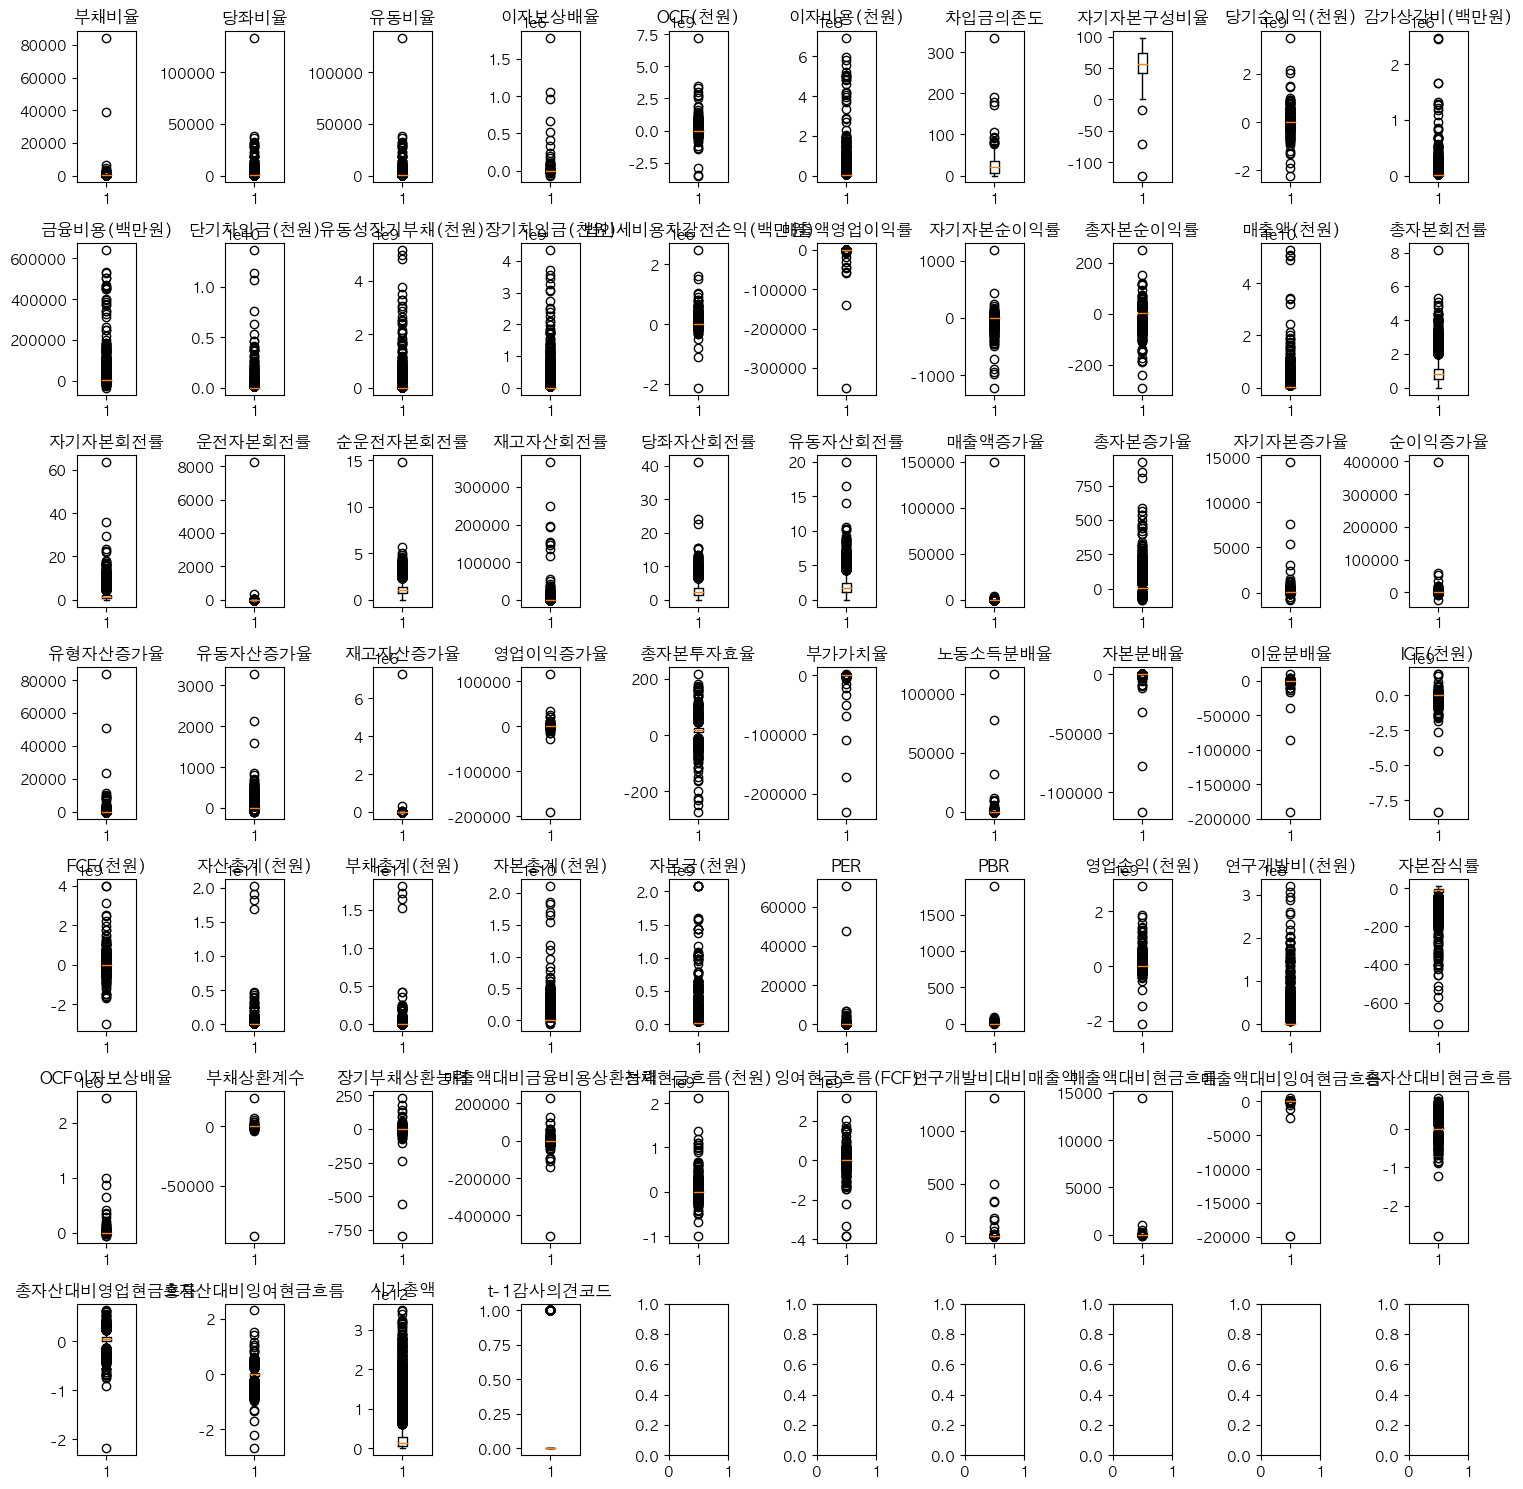

In [124]:
import math
import matplotlib.pyplot as plt

df_수치_윈저라이징전 = train_data[train_data.select_dtypes(float).columns]

# 전체 그래프의 개수
n_graphs = len(df_수치_윈저라이징전.columns)

# 한 줄에 10개의 그래프를 그리기 위한 행(row)의 개수 계산
n_rows = math.ceil(n_graphs / 10)

# figure와 axes 생성
fig, axes = plt.subplots(n_rows, 10, figsize=(15, 15))

# 각 컬럼에 대한 boxplot 그리기
for i, col in enumerate(df_수치_윈저라이징전):
    ax = axes[i // 10, i % 10]
    ax.boxplot(df_수치_윈저라이징전[col].dropna())
    ax.set_title(col, fontsize=12)

plt.tight_layout()
plt.show()

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


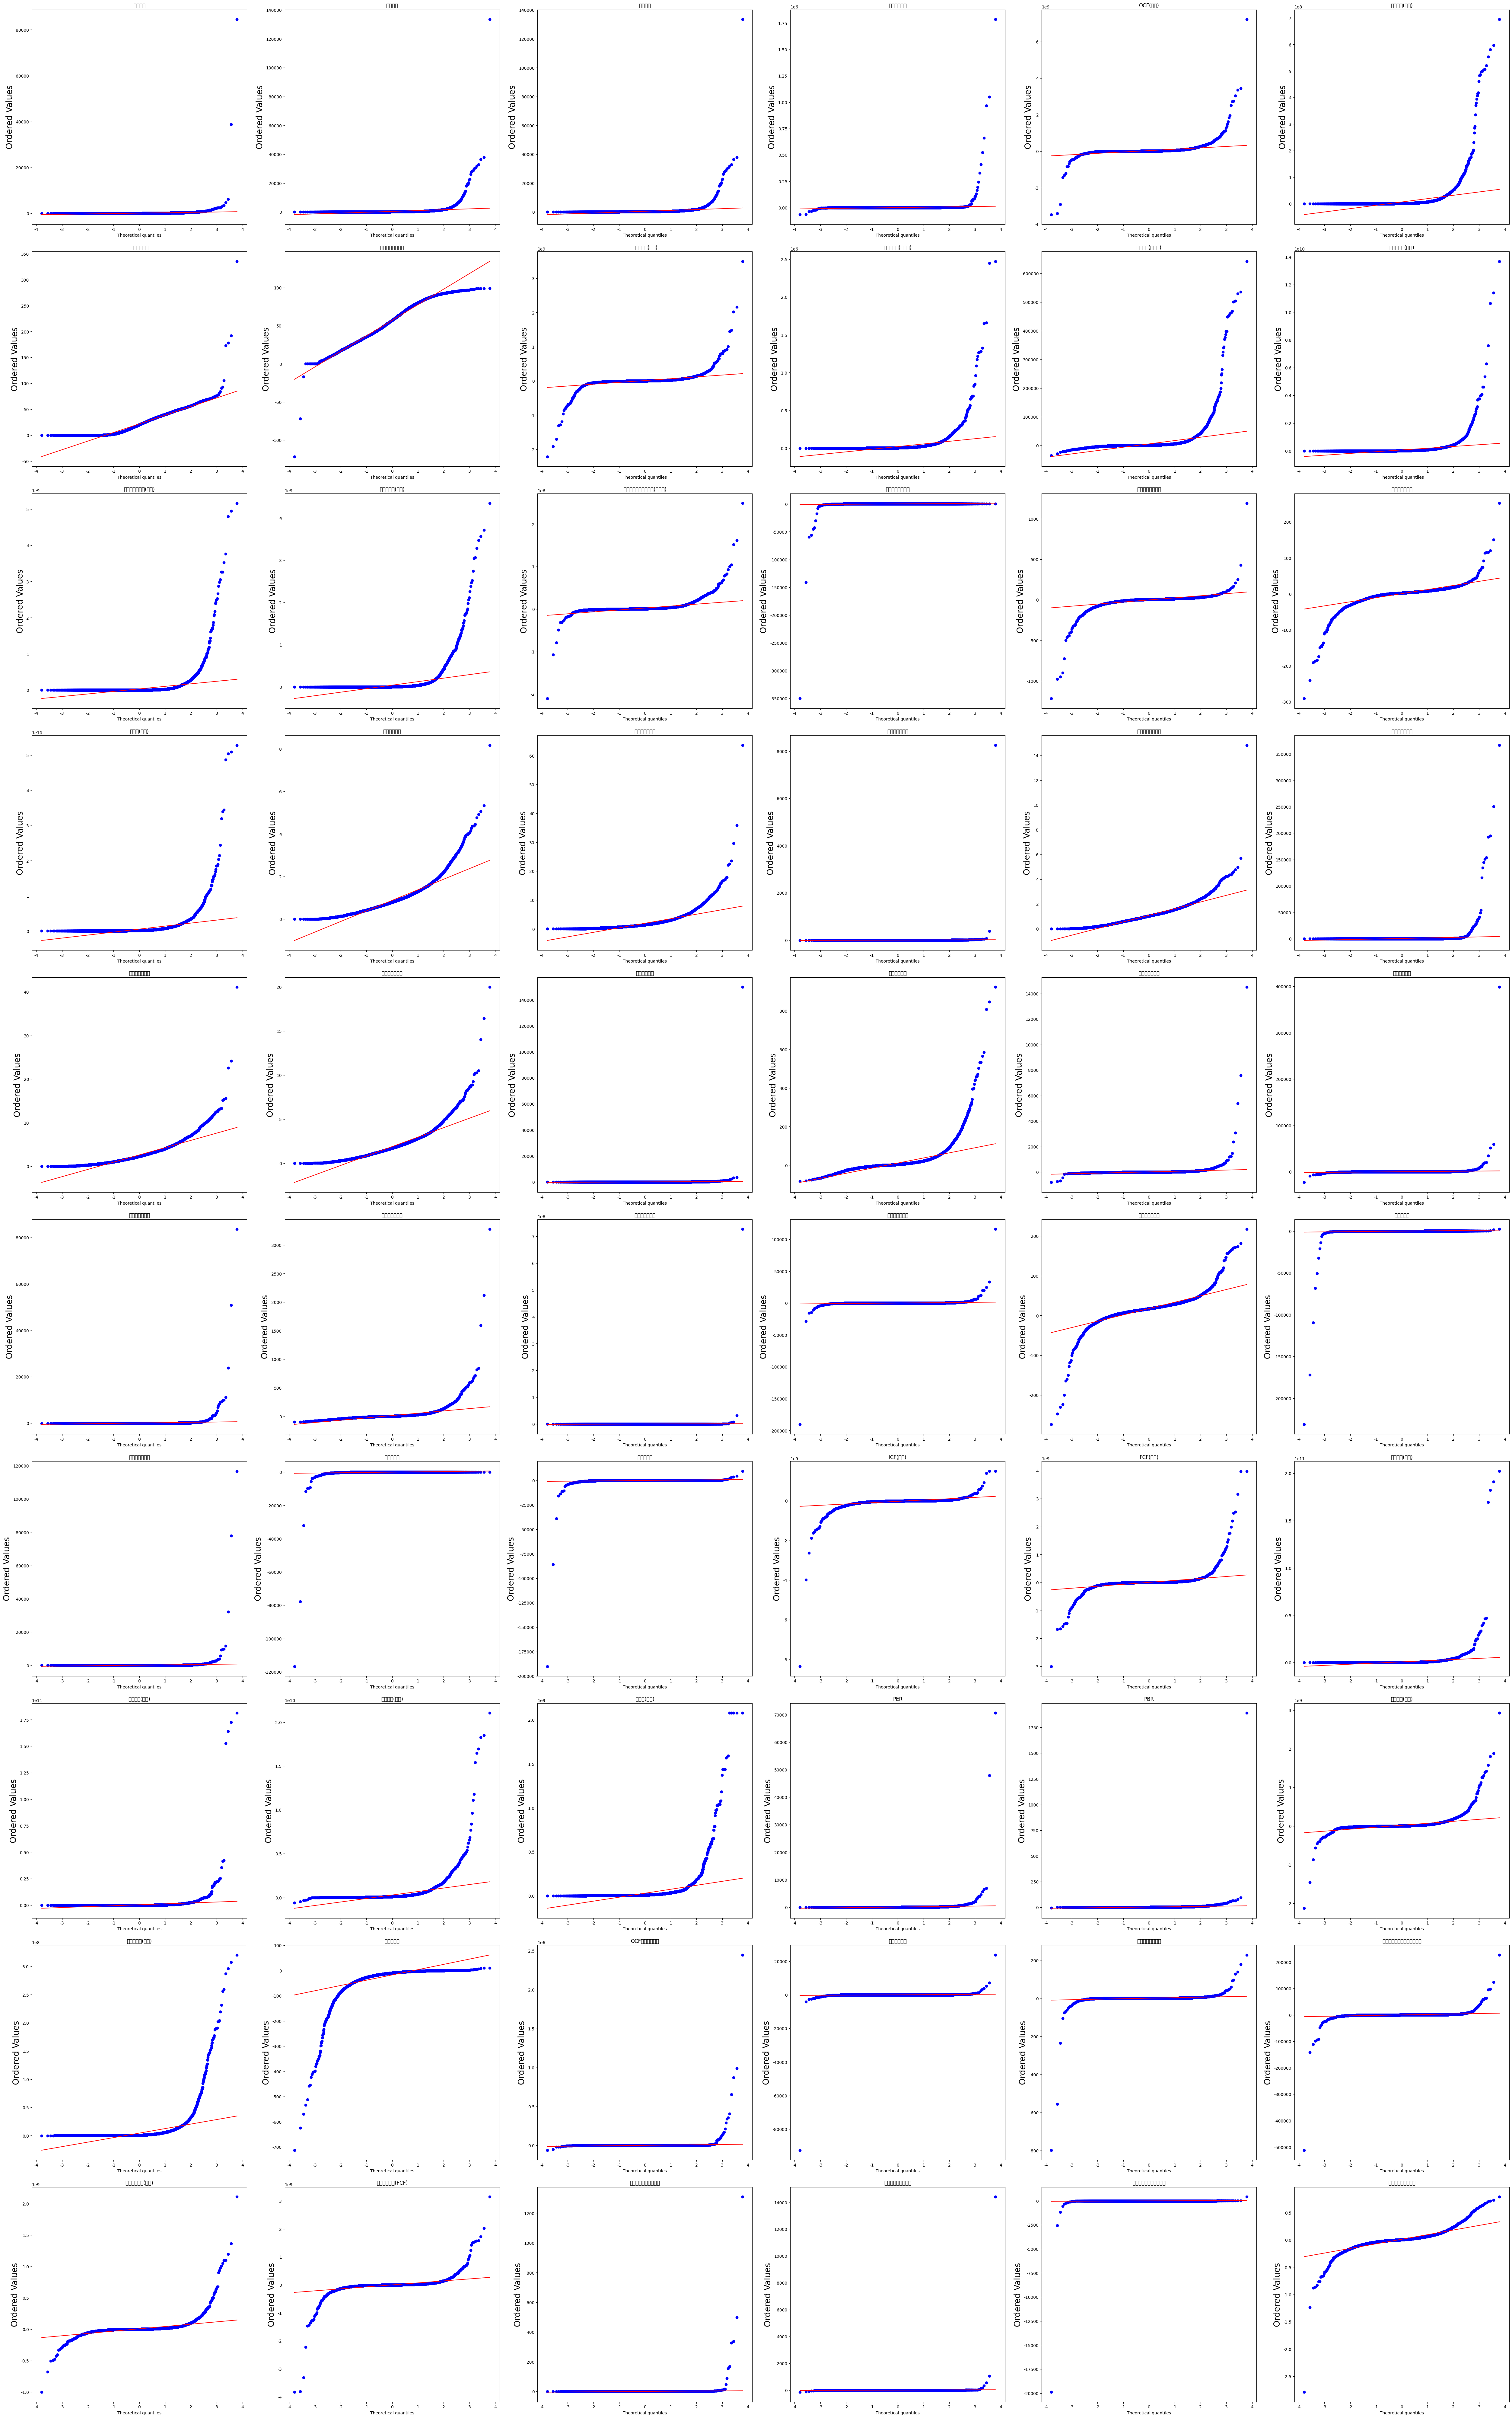

In [125]:
from scipy import stats

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((50, 80))

    for ax, i in zip(axs.ravel(), df):
            ax.set_title(col, fontsize=20)  # 글씨 크기 설정
            ax.set_ylabel('Value', fontsize=20)  # 글씨 크기 설정
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(df_수치_윈저라이징전,6,10)

---

#### 양쪽 꼬리를 drop하는 함수
    - 고려중

In [ ]:
import numpy as np

def trimmed_mean_with_ratio(data, left_trim_ratio=0.01, right_trim_ratio=0.01):
    data.sort()
    left_trim_size = int(len(data) * left_trim_ratio)
    right_trim_size = int(len(data) * right_trim_ratio)
    trimmed_data = data[left_trim_size:-right_trim_size]
    return np.mean(trimmed_data)


---

In [ ]:
# 데이터프레임에서 '이자보상배율' 열의 1퍼센트 절사평균과 표준편차 계산
def trimmed_mean_1(x):
    trim_pct = 0.02
    lower_bound = np.percentile(x, trim_pct * 100)
    upper_bound = np.percentile(x, (1 - trim_pct) * 100)
    trimmed_values = x[(x >= lower_bound) & (x <= upper_bound)]
    return trimmed_values.mean()

def trimmed_std_1(x):
    trim_pct = 0.02
    lower_bound = np.percentile(x, trim_pct * 100)
    upper_bound = np.percentile(x, (1 - trim_pct) * 100)
    trimmed_values = x[(x >= lower_bound) & (x <= upper_bound)]
    return trimmed_values.std()

train_data['평균이보배'] = train_data.groupby(['산업분류', 'Year'])['이자보상배율'].transform(trimmed_mean_1)
train_data['이보배표준편차'] = train_data.groupby(['산업분류', 'Year'])['이자보상배율'].transform(trimmed_std_1)

# 개별 이자보상배율과 평균-표준편차를 비교하여 이보배초과여부 계산
train_data['이보배초과여부'] = np.where(train_data['이자보상배율'] < (train_data['평균이보배'] - train_data['이보배표준편차']), 1, 0)

In [ ]:
train_data[['회사명','거래소코드','산업분류','Year','이자보상배율', '평균이보배', '이보배초과여부']].head(50)

,회사명,거래소코드,산업분류,Year,이자보상배율,평균이보배,이보배초과여부
12193,신진에스엠,138070,제조업,2016,3.512567,240.334138,0
8171,테크엘,64520,제조업,2015,2.022489,175.656178,0
8336,파커스,65690,제조업,2016,39.753815,240.334138,0
14051,지니언스,263860,정보통신업,2015,20.802099,656.205982,0
6790,한빛소프트,47080,정보통신업,2015,-0.657270,656.205982,0
7367,케이엑스하이텍,52900,제조업,2014,4.309459,156.735076,0
6741,서울반도체,46890,제조업,2011,5.499307,133.527781,0
3272,에이치디씨,12630,금융 및 보험업,2012,1.044218,110.896006,0
13456,신라젠,215600,"전문, 과학 및 기술 서비스업",2019,-10.731701,20.542326,0
11970,앱코,129890,제조업,2018,0.012344,193.057209,0


In [ ]:
train_data['이보배초과여부'].value_counts()

이보배초과여부
0    11133
1      197
Name: count, dtype: int64

In [ ]:
train_data[train_data['이보배초과여부']==1]['t-2감사의견코드'].value_counts()

t-1감사의견코드
0.0    196
1.0      1
Name: count, dtype: int64

In [ ]:
train_data['이자보상배율'].std()

111216.2172648413

In [ ]:
train_data['이자보상배율'].mean()

2536.2571279748468

In [126]:
len(train_data[train_data['이자보상배율']==999999999.0])

0

In [ ]:
train_data.describe()

,거래소코드,회계년도,Year,산업분류코드,부채비율,당좌비율,유동비율,이자보상배율,OCF(천원),이자비용(천원),...,연구개발비대비매출액,매출액대비현금흐름,매출액대비잉여현금흐름,총자산대비현금흐름,총자산대비영업현금흐름,총자산대비잉여현금흐름,t-1감사의견코드,평균이보배,이보배표준편차,이보배초과여부
count,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,1.133000e+04,1.133000e+04,...,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,1.129400e+04,11224.000000,11330.000000
mean,78983.233010,2016.498853,2016.498853,35.602824,138.419296,347.459770,389.243524,2.536257e+03,3.756786e+07,8.579051e+06,...,0.489837,1.835058,-2.500783,0.013694,0.041506,-0.020185,0.005119,6.492571e+02,514.935980,0.017387
std,82065.004952,3.149811,3.149811,17.980513,1026.142942,1807.842661,1810.636762,1.112162e+05,4.221078e+08,4.673973e+07,...,20.893503,140.338212,189.130743,0.091084,0.098794,0.140905,0.071368,5.197926e+04,418.133132,0.130716
min,20.000000,2011.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,-1.037850e+06,-3.480396e+09,0.000000e+00,...,-0.004381,-151.473356,-19895.239494,-1.236515,-1.478836,-1.339021,0.000000,-1.086630e+01,0.454023,0.000000
25%,15750.000000,2014.000000,2014.000000,23.000000,37.012500,73.862500,100.197500,3.704660e-01,-1.716850e+05,2.892272e+05,...,0.000000,-0.020968,-0.082782,-0.016736,-0.001391,-0.065044,0.000000,3.050802e+01,88.546792,0.000000
50%,53070.000000,2017.000000,2017.000000,29.000000,78.605000,125.430000,160.060000,4.334426e+00,7.351839e+06,1.270034e+06,...,0.003829,0.006529,-0.001910,0.005873,0.045224,-0.001775,0.000000,1.444913e+02,651.043224,0.000000
75%,101730.000000,2019.000000,2019.000000,46.000000,145.537500,247.675000,301.365000,2.181478e+01,2.607367e+07,4.161471e+06,...,0.023500,0.047514,0.052788,0.037458,0.091072,0.045626,0.000000,1.930572e+02,772.454193,0.000000
max,425420.000000,2021.000000,2021.000000,96.000000,84510.240000,102156.430000,102156.430000,8.432559e+06,3.797281e+10,2.344328e+09,...,1641.842672,14405.613671,372.396121,0.794583,0.782707,2.306988,1.000000,5.524123e+06,2141.016803,1.000000


In [ ]:
train_data.columns

Index(['회사명', '거래소코드', '회계년도', 'Year', '산업분류코드', '산업분류', '부채비율', '당좌비율',
       '유동비율', '이자보상배율', 'OCF(천원)', '이자비용(천원)', '차입금의존도', '자기자본구성비율',
       '당기순이익(천원)', '감가상각비(백만원)', '금융비용(백만원)', '단기차입금(천원)', '유동성장기부채(천원)',
       '장기차입금(천원)', '법인세비용차감전손익(백만원)', '매출액영업이익률', '자기자본순이익률', '총자본순이익률',
       '매출액(천원)', '총자본회전률', '자기자본회전률', '운전자본회전률', '순운전자본회전률', '재고자산회전률',
       '당좌자산회전률', '유동자산회전률', '매출액증가율', '총자본증가율', '자기자본증가율', '순이익증가율',
       '유형자산증가율', '유동자산증가율', '재고자산증가율', '영업이익증가율', '총자본투자효율', '부가가치율',
       '노동소득분배율', '자본분배율', '이윤분배율', 'ICF(천원)', 'FCF(천원)', '자산총계(천원)',
       '부채총계(천원)', '자본총계(천원)', '자본금(천원)', 'PER', 'PBR', '영업손익(천원)',
       '연구개발비(천원)', '자본잠식률', 'OCF이자보상배율', '부채상환계수', '장기부채상환능력',
       '매출액대비금융비용상환능력', '전체현금흐름(천원)', '잉여현금흐름(FCF)', '연구개발비대비매출액', '매출액대비현금흐름',
       '매출액대비잉여현금흐름', '총자산대비현금흐름', '총자산대비영업현금흐름', '총자산대비잉여현금흐름', '기업수명주기',
       't-1감사의견코드', '평균이보배', '이보배표준편차', '이보배초과여부'],
      dtype='object')